<a href="https://colab.research.google.com/github/jakubweglowski/Machine-Learning-Summer-2024-25/blob/main/Homework12_NLP-towards-attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To perform analysis, we load a pre-trained `fasttext-wiki-news-subwords-300` model from `gensim` library. In this embedding, each word is paired with a vector from $\mathbb{R}^{300}$ space.

In [ ]:
import numpy as np
import gensim.downloader as gend

# Load pre-trained Word2Vec model.
vectors = gend.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 958.5/958.4MB downloaded


# Semantic Pair Classes
Below we present the 10 semantic classes, each with 5 word pairs, for a total of 100 unique words.

- Class 1: Gender

    - (man, woman)
    - (king, queen)
    - (prince, princess)
    - (actor, actress)
    - (brother, sister)

- Class 2: Verb Tense (Present, Past)

    - (see, saw)
    - (go, went)
    - (do, did)
    - (take, took)
    - (eat, ate)

- Class 3: Singular to Plural

    - (book, books)
    - (car, cars)
    - (house, houses)
    - (child, children)
    - (person, people)

- Class 4: Country to Capital

    - (germany, berlin)
    - (france, paris)
    - (japan, tokyo)
    - (italy, rome)
    - (spain, madrid)

- Class 5: Comparative Adjectives

    - (good, better)
    - (bad, worse)
    - (big, bigger)
    - (small, smaller)
    - (fast, faster)

- Class 6: Superlative Adjectives

    - (good, best)
    - (bad, worst)
    - (big, biggest)
    - (small, smallest)
    - (fast, fastest)

- Class 7: Animal and Young

    - (dog, puppy)
    - (cat, kitten)
    - (cow, calf)
    - (horse, foal)
    - (duck, duckling)

- Class 8: Person and Job

    - (teacher, teach)
    - (baker, bake)
    - (painter, paint)
    - (writer, write)
    - (driver, drive)

- Class 9: Opposite Adjectives

    - (hot, cold)
    - (old, new)
    - (happy, sad)
    - (dark, light)
    - (rich, poor)

- Class 10: Currency and Country

    - (usa, dollar)
    - (japan, yen)
    - (mexico, peso)
    - (india, rupee)
    - (uk, pound)

We rewrite the classes into a `python` dictionary

In [ ]:
semantic_classes = {
    "gender": [
        ("man", "woman"),
        ("king", "queen"),
        ("prince", "princess"),
        ("actor", "actress"),
        ("brother", "sister")
    ],
    "verb_tense": [
        ("see", "saw"),
        ("go", "went"),
        ("do", "did"),
        ("take", "took"),
        ("eat", "ate")
    ],
    "singular_to_plural": [
        ("book", "books"),
        ("car", "cars"),
        ("house", "houses"),
        ("child", "children"),
        ("person", "people")
    ],
    "country_to_capital": [
        ("poland", "warsaw"),
        ("france", "paris"),
        ("japan", "tokyo"),
        ("italy", "rome"),
        ("spain", "madrid")
    ],
    "comparative_adjectives": [
        ("good", "better"),
        ("bad", "worse"),
        ("big", "bigger"),
        ("small", "smaller"),
        ("fast", "faster")
    ],
    "superlative_adjectives": [
        ("good", "best"),
        ("bad", "worst"),
        ("big", "biggest"),
        ("small", "smallest"),
        ("fast", "fastest")
    ],
    "animal_and_young": [
        ("dog", "puppy"),
        ("cat", "kitten"),
        ("cow", "calf"),
        ("horse", "foal"),
        ("duck", "duckling")
    ],
    "person_and_job": [
        ("teacher", "teach"),
        ("baker", "bake"),
        ("painter", "paint"),
        ("writer", "write"),
        ("driver", "drive")
    ],
    "opposite_adjectives": [
        ("hot", "cold"),
        ("old", "new"),
        ("happy", "sad"),
        ("dark", "light"),
        ("rich", "poor")
    ],
    "currency_and_country": [
        ("usa", "dollar"),
        ("poland", "zloty"),
        ("mexico", "peso"),
        ("india", "rupee"),
        ("uk", "pound")
    ]
}

# Example of how to access a specific class
print("--- Example: Gender Class ---")
print(semantic_classes["gender"])

# Example of how to access a specific pair
print("\n--- Example: A specific pair from the Country-Capital class ---")
print(semantic_classes["country_to_capital"][0])

--- Example: Gender Class ---
[('man', 'woman'), ('king', 'queen'), ('prince', 'princess'), ('actor', 'actress'), ('brother', 'sister')]

--- Example: A specific pair from the Country-Capital class ---
('poland', 'warsaw')


Next, we create a `numpy` array with word vector embeddings as columns (i.e. each column represents one word).

In [ ]:
words_list = []
embeddings_array = np.zeros((300, 100))
index = 0
for key, val in semantic_classes.items():
    for el in val:
        w1, w2 = el

        words_list.append(w1)
        words_list.append(w2)

        embeddings_array[:, index] = vectors[w1]
        embeddings_array[:, index+1] = vectors[w2]

        index += 2

We check if the array is created correctly:

In [ ]:
embeddings_array[:, 0][:3]

array([-0.03836  ,  0.0045275,  0.052304 ])

In [ ]:
vectors["man"][:3]

array([-0.03836  ,  0.0045275,  0.052304 ], dtype=float32)

# PCA analysis

## Global variant

In [ ]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
fitted = model.fit(embeddings_array)

components = fitted.components_

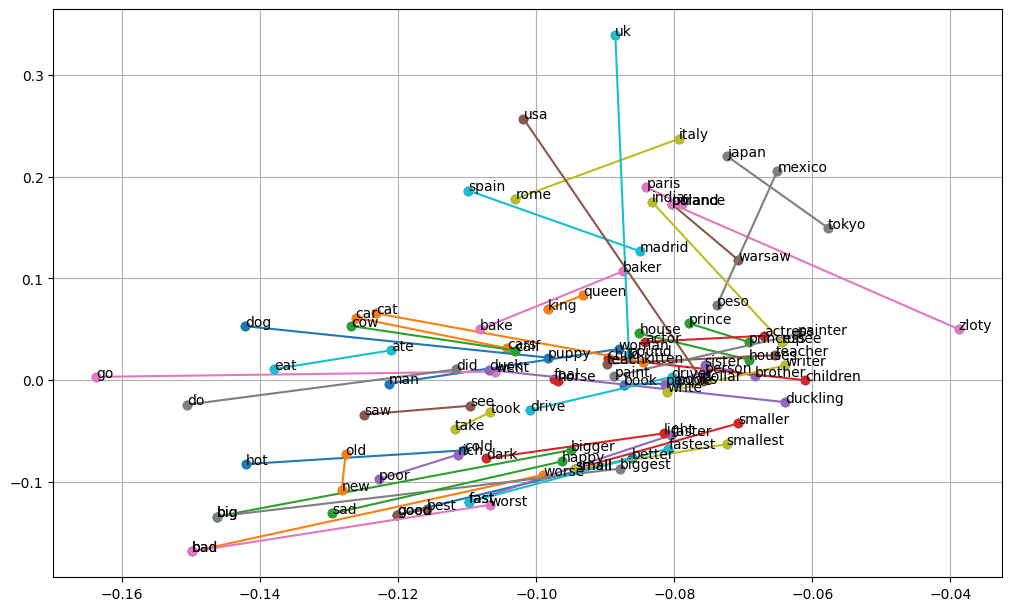

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.scatter(components[0, :], components[1, :])
for i, txt in enumerate(words_list):
    ax.annotate(txt, (components[0, i], components[1, i]))

for j in range(0, 100, 2):
    ax.plot((components[0, j], components[0, j + 1]),
            (components[1, j], components[1, j + 1]),
            '-o')

ax.grid(visible=True)

We can see that there are some clouds of points that are semantically similar, like e.g. "japan", "tokyo", "mexico", "italy" in the upper-right corner.

Let's plot one-class PCAs:

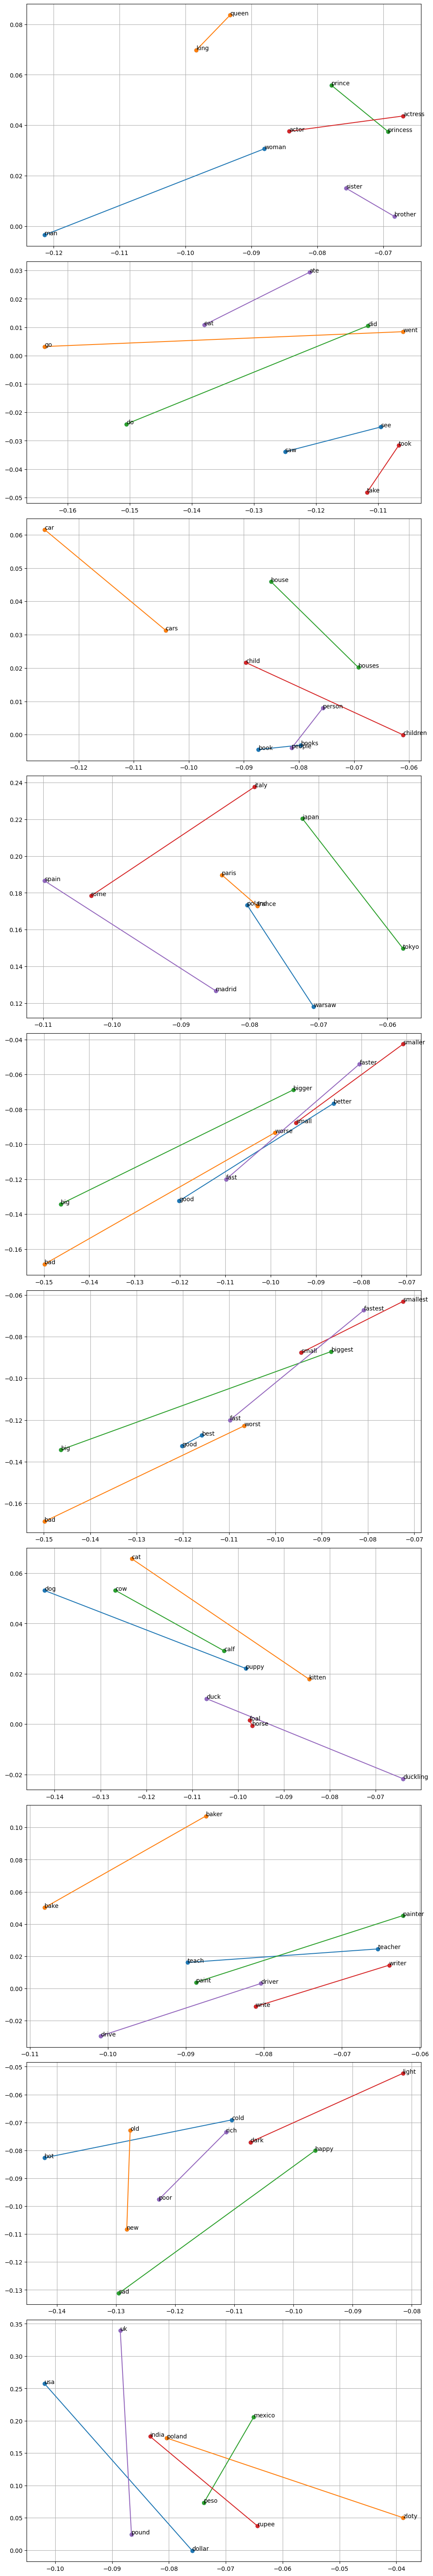

In [ ]:
fig, Ax = plt.subplots(10, figsize=(10, 60), layout='constrained')

for i in range(10):

    ax = Ax[i]

    ax.scatter(components[0, 10*i : 10*(i+1)], components[1, 10*i : 10*(i+1)])

    for j, txt in enumerate(words_list[10*i : 10*(i+1)]):
        ax.annotate(txt, (components[0, 10*i + j], components[1, 10*i + j]))

    for j in range(0, 10, 2):
        ax.plot((components[0, 10*i + j], components[0, 10*i + j + 1]),
                (components[1, 10*i + j], components[1, 10*i + j + 1]),
                '-o')

    ax.grid(visible=True)

There are some cases where the words that come from one pair are close to each other on the plots (like "good" and "best", "foal" and "horse"), but in general the points of words do not lay "in semantic pairs".

## Local variant

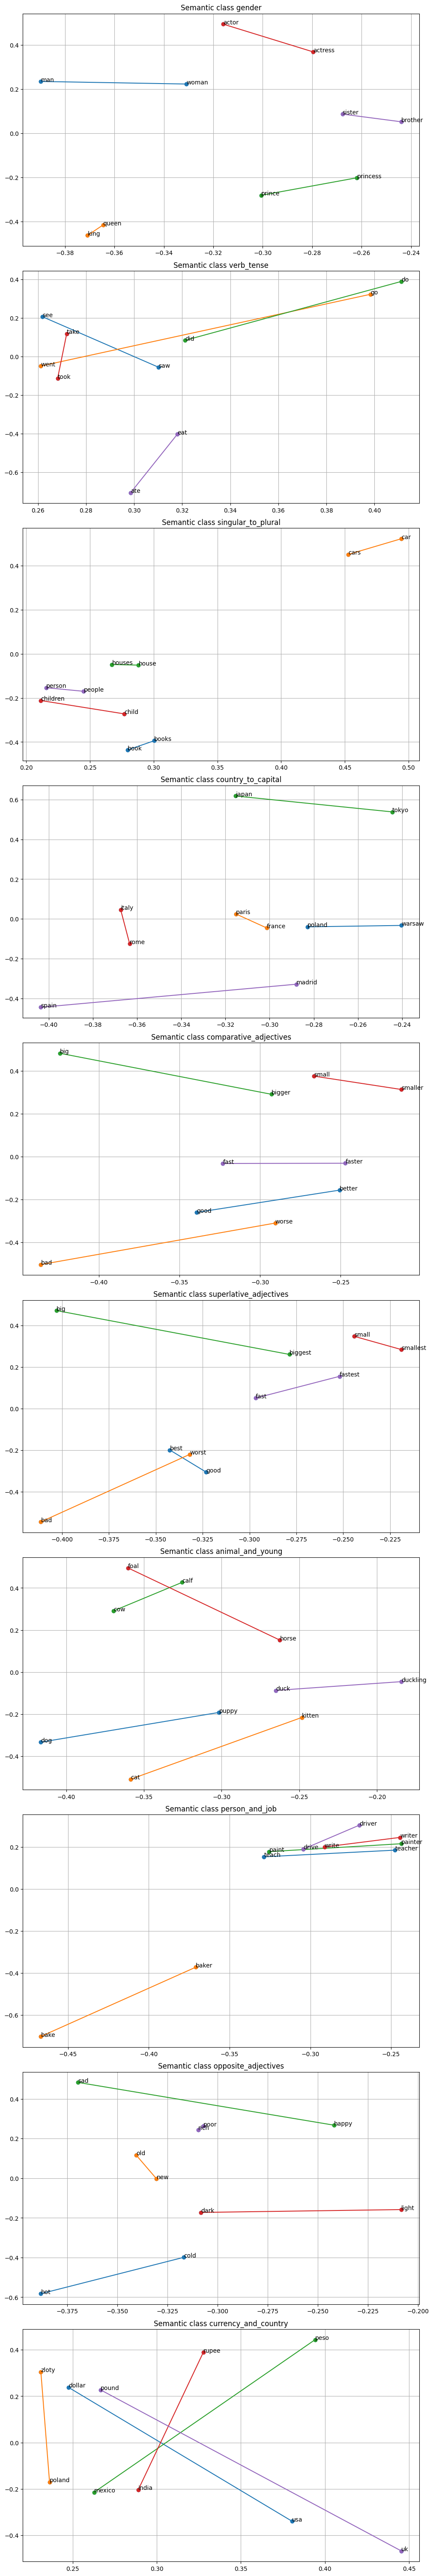

In [ ]:
fig, Ax = plt.subplots(10, figsize=(10, 60), layout='constrained')


for i in range(10):

    ax = Ax[i]

    model = PCA(n_components=2)
    fitted = model.fit(embeddings_array[:, 10*i : 10*(i+1)])

    components = fitted.components_

    ax.scatter(components[0, :], components[1, :])
    for j, txt in enumerate(words_list[10*i : 10*(i+1)]):
        ax.annotate(txt, (components[0, j], components[1, j]))

    for j in range(0, 10, 2):
        ax.plot((components[0, j], components[0, j + 1]),
                (components[1, j], components[1, j + 1]),
                '-o')

    ax.grid(visible=True)
    ax.set_title("Semantic class {}".format(list(semantic_classes.keys())[i]))

As we can see from the plots, in many cases the words that are paired lay close to each other on the plots ("old" and "new", "rich" and "poor", "houses" and "house"). On the other hand, many times the model does not consider the paired words similar after PCA dimensionality reduction. Perhaps the reduction is too big: from $300$ dimensional space into $2D$.

# Embedding arithmetic

In [ ]:
for key, val in semantic_classes.items():

    w1, w2 = val[0]
    w3, w4 = val[-1]

    print(f"Semantic class {key}:\n{w1} - {w2} + {w4} = ")
    ms = vectors.most_similar(positive = [w1, w4], negative = [w2], topn=5)
    for el in ms:
        print(f'\t{el[0]}, similarity = {el[1]:.4f}', end=' ')
        if el[0] == w3: print('OK!')
        else: print()

    print()

Semantic class gender:
man - woman + sister = 
	brother, similarity = 0.8284 OK!
	cousin, similarity = 0.7106 
	step-brother, similarity = 0.6968 
	uncle, similarity = 0.6901 
	brother-in-law, similarity = 0.6843 

Semantic class verb_tense:
see - saw + ate = 
	eat, similarity = 0.7351 OK!
	eate, similarity = 0.6256 
	eaten, similarity = 0.6248 
	eat., similarity = 0.6144 
	eats, similarity = 0.6051 

Semantic class singular_to_plural:
book - books + people = 
	person, similarity = 0.6767 OK!
	poeople, similarity = 0.6528 
	people-and, similarity = 0.6500 
	everyone, similarity = 0.6396 
	people--all, similarity = 0.6370 

Semantic class country_to_capital:
poland - warsaw + madrid = 
	spain, similarity = 0.6573 OK!
	barcelona, similarity = 0.6389 
	valencia, similarity = 0.6329 
	portugal, similarity = 0.6288 
	belgium, similarity = 0.6073 

Semantic class comparative_adjectives:
good - better + faster = 
	fast, similarity = 0.7561 OK!
	slower, similarity = 0.6643 
	super-fast, simila

In every semantic class we can find a true answer among the top-5 similar words (which I personally find kind of amazing!). Moreover, in the first 6 semantic classes, the correct answer is the most similar.

To conclude, the pre-trained models seem to follow the semantic meaning of words with the structure of embedding space.